<a href="https://colab.research.google.com/github/KatBotkowska/WiT_workshops/blob/main/chocolate_bar_ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import io
from unicodedata import normalize
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#podłączenie google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Pobranie danych z Kaggle - nie odpalać

In [ ]:
root_path = 'gdrive/My Drive/WiT_workshops/'

In [ ]:
cd 'gdrive/My Drive/WiT_workshops/'

/content/gdrive/My Drive/WiT_workshops


In [ ]:
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"kbotkowska","key":"90ebb11108c952959800f5549af3472d"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [ ]:
!kaggle datasets download -d rtatman/chocolate-bar-ratings
# !kaggle datasets download -d sid321axn/beijing-multisite-airquality-data-set

chocolate-bar-ratings.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q chocolate-bar-ratings.zip -d [datasets]

replace [datasets]/flavors_of_cacao.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


#Czyszczenie danych

In [ ]:
choco = pd.read_csv('/content/gdrive/MyDrive/WiT_workshops/[datasets]/flavors_of_cacao.csv', encoding='utf-8')

In [ ]:
choco.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [ ]:
choco.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [ ]:
#usunięcie znaku nowej linii \n z nazw kolumn
choco.columns = [column.replace('\n', '') for column in choco.columns.values]
choco.columns

Index(['Company (Maker-if known)', 'Specific Bean Originor Bar Name', 'REF',
       'ReviewDate', 'CocoaPercent', 'CompanyLocation', 'Rating', 'BeanType',
       'Broad BeanOrigin'],
      dtype='object')

In [ ]:
#zmiana nazwy kolumn
choco.columns = ['Company', 'Name', 'ReviewDataReference',
       'ReviewDate', 'CocoaPercent', 'Country', 'Rating', 'BeanType',
       'BroadBeanOrigin']

In [ ]:
choco.columns

Index(['Company', 'Name', 'ReviewDataReference', 'ReviewDate', 'CocoaPercent',
       'Country', 'Rating', 'BeanType', 'BroadBeanOrigin'],
      dtype='object')

In [ ]:
#usunięcie znaku % z kolumny CocoaPercent
choco['CocoaPercent'] = choco['CocoaPercent'].apply(lambda x: float(x.replace('%', ''))/100)

In [ ]:
choco['CocoaPercent']

0       0.63
1       0.70
2       0.70
3       0.70
4       0.70
        ... 
1790    0.70
1791    0.65
1792    0.65
1793    0.62
1794    0.65
Name: CocoaPercent, Length: 1793, dtype: float64

In [ ]:
 #ile pustych danych (nulli) mamy w tabeli?
choco.isnull().sum()

Company                0
Name                   0
ReviewDataReference    0
ReviewDate             0
CocoaPercent           0
Country                0
Rating                 0
BeanType               0
BroadBeanOrigin        0
dtype: int64

In [ ]:
#usuwa wiersze z pustymi danymi - tutaj są tylko 2 takie wiersze
choco.dropna(inplace=True)

In [ ]:
 #ile pustych danych (nulli) mamy w tabeli?
choco.isnull().sum()

Company                0
SpecificBeanOrigin     0
ReviewDataReference    0
ReviewDate             0
CocoaPercent           0
CompanyLocation        0
Rating                 0
BeanType               0
BroadBeanOrigin        0
dtype: int64

In [ ]:
#okazuje się, że w kolumnie 'BeanType' są znaki oznaczające spację
choco.loc[1427]['BeanType']

'\xa0'

In [ ]:
funkcja1 = lambda x: x.replace(u'\xa0', u'')
choco['BeanType'] = choco['BeanType'].apply(funkcja1)

In [ ]:
choco.loc[1427]['BeanType']

''

In [ ]:
choco.isnull().sum()

Company                0
SpecificBeanOrigin     0
ReviewDataReference    0
ReviewDate             0
CocoaPercent           0
CompanyLocation        0
Rating                 0
BeanType               0
BroadBeanOrigin        0
dtype: int64

In [ ]:
choco.isna().sum()

Company                0
SpecificBeanOrigin     0
ReviewDataReference    0
ReviewDate             0
CocoaPercent           0
CompanyLocation        0
Rating                 0
BeanType               0
BroadBeanOrigin        0
dtype: int64

In [ ]:
choco['BeanType']

0                
1                
2                
3                
4                
          ...    
1790             
1791    Forastero
1792    Forastero
1793             
1794             
Name: BeanType, Length: 1793, dtype: object

##Charakterystyka datasetu

In [ ]:
choco.shape

(1793, 9)

In [ ]:
choco.dtypes

Company                 object
Name                    object
ReviewDataReference      int64
ReviewDate               int64
CocoaPercent           float64
Country                 object
Rating                 float64
BeanType                object
BroadBeanOrigin         object
dtype: object

In [ ]:
choco.describe()

,ReviewDataReference,ReviewDate,CocoaPercent,Rating
count,1793.000000,1793.000000,1793.000000,1793.000000
mean,1036.126046,2012.326269,0.716991,3.185862
std,553.128742,2.928666,0.063265,0.477668
min,5.000000,2006.000000,0.420000,1.000000
25%,576.000000,2010.000000,0.700000,3.000000
50%,1073.000000,2013.000000,0.700000,3.250000
75%,1502.000000,2015.000000,0.750000,3.500000
max,1952.000000,2017.000000,1.000000,5.000000


In [ ]:
choco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1793 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1793 non-null   object 
 1   Name                 1793 non-null   object 
 2   ReviewDataReference  1793 non-null   int64  
 3   ReviewDate           1793 non-null   int64  
 4   CocoaPercent         1793 non-null   float64
 5   Country              1793 non-null   object 
 6   Rating               1793 non-null   float64
 7   BeanType             1793 non-null   object 
 8   BroadBeanOrigin      1793 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 220.1+ KB


In [ ]:
#sortowanie danych
choco.sort_values(['Rating', 'CocoaPercent'], ascending=False).head(10)

,Company,Name,ReviewDataReference,ReviewDate,CocoaPercent,Country,Rating,BeanType,BroadBeanOrigin
78,Amedei,Chuao,111,2007,0.70,Italy,5.0,Trinitario,Venezuela
86,Amedei,Toscano Black,40,2006,0.70,Italy,5.0,Blend,
1528,Soma,Crazy 88,1077,2013,0.88,Canada,4.0,,"Guat., D.R., Peru, Mad., PNG"
1335,Pralus,Fortissima,93,2006,0.80,France,4.0,"Criollo, Trinitario",Ecuador
1427,Scharffen Berger,San Juan de Cheni,959,2012,0.78,U.S.A.,4.0,,Peru
77,Amedei,Nine,111,2007,0.75,Italy,4.0,Blend,
222,Bonnat,Kaori,1339,2014,0.75,France,4.0,,Brazil
231,Bonnat,Haiti,629,2011,0.75,France,4.0,,Haiti
232,Bonnat,"Madagascar, 100% criollo",629,2011,0.75,France,4.0,Criollo,Madagascar
239,Bonnat,"Porcelana, Venezuela",199,2008,0.75,France,4.0,Criollo (Porcelana),Venezuela


In [ ]:
chocoMelt = choco.melt(id_vars=['Country','Company', 'Name'])  #zmiana kolumn na wiersze - tworzy nową zmienną variable zawierającą nazwy kolumn, id_vars - wartości które są bez zmian, value - wartości dla zmiennej variable
chocoMelt.sort_values(['Country'], ascending=False).head(10)

,Country,Company,Name,variable,value
9121,Wales,Baravelli's,single estate,BroadBeanOrigin,Costa Rica
5535,Wales,Baravelli's,single estate,Rating,2.75
3742,Wales,Baravelli's,single estate,CocoaPercent,0.8
156,Wales,Baravelli's,single estate,ReviewDataReference,955
1949,Wales,Baravelli's,single estate,ReviewDate,2012
7328,Wales,Baravelli's,single estate,BeanType,
1054,Vietnam,Marou,Dong Nai,ReviewDataReference,845
1051,Vietnam,Marou,"Dak Lak, Batch 2451",ReviewDataReference,1650
1052,Vietnam,Marou,"Tan Phu Dong, Treasure Island",ReviewDataReference,1149
1053,Vietnam,Marou,Ba Ria,ReviewDataReference,845


In [ ]:
countries = choco.groupby('Country').agg({
    'Rating': 'mean',
    'Name': 'count'
})
countries.sort_values(by='Rating', ascending=False).head(10)

,Rating,Name
Country,,
Chile,3.750000,2
Amsterdam,3.500000,4
Netherlands,3.500000,4
Philippines,3.500000,1
Iceland,3.416667,3
Vietnam,3.409091,11
Brazil,3.397059,17
Poland,3.375000,8
Australia,3.357143,49


In [ ]:
countries_with_cocoapercent = choco.groupby('Country').agg({
    'Rating': 'mean',
    'CocoaPercent': 'mean'
})
countries_with_cocoapercent.sort_values(by='Rating', ascending=False).head(10)

,Rating,CocoaPercent
Country,,
Chile,3.750000,0.700000
Amsterdam,3.500000,0.732500
Netherlands,3.500000,0.700000
Philippines,3.500000,0.650000
Iceland,3.416667,0.686667
Vietnam,3.409091,0.745455
Brazil,3.397059,0.698235
Poland,3.375000,0.718750
Australia,3.357143,0.702245


In [ ]:
countries_with_cocoapercent.sort_values(by='CocoaPercent', ascending=False).head(10)

,Rating,CocoaPercent
Country,,
Sao Tome,2.937500,0.821250
Wales,2.750000,0.800000
Ghana,2.750000,0.800000
Ireland,2.812500,0.785000
Portugal,2.750000,0.760000
Eucador,3.000000,0.750000
Niacragua,2.750000,0.750000
Honduras,3.208333,0.750000
Fiji,3.250000,0.750000


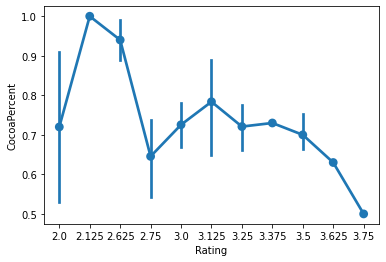

In [ ]:
df = choco[['Rating','CocoaPercent']].groupby(["CocoaPercent"]).median().reset_index()
sns.pointplot(x='Rating', y='CocoaPercent', data=df)

In [ ]:
choco[['CocoaPercent', 'Rating']].corr()
#słaba ujemna korelacja - ale w przypadku zawartości kakao dane mają charakter ciągły, więc trzeba sprawdzić to przez ANOVA (przy rozkładzie normalnym i homogeniczności wariancji) albo testem nieparametrycznym

,CocoaPercent,Rating
CocoaPercent,1.000000,-0.164758
Rating,-0.164758,1.000000


In [ ]:
p_value=pearsonr(choco['Rating'], choco['CocoaPercent'])[1]
p_value.round(10)

0.0

In [ ]:
choco['Rating'].unique()


array([3.75, 2.75, 3.  , 3.5 , 4.  , 3.25, 2.5 , 5.  , 1.75, 1.5 , 2.25,
       2.  , 1.  ])

In [ ]:
choco['CocoaPercent'].unique()

array([0.63 , 0.7  , 0.6  , 0.8  , 0.88 , 0.72 , 0.55 , 0.75 , 0.65 ,
       0.85 , 0.73 , 0.64 , 0.66 , 0.68 , 0.5  , 1.   , 0.77 , 0.9  ,
       0.71 , 0.83 , 0.78 , 0.74 , 0.76 , 0.86 , 0.82 , 0.69 , 0.91 ,
       0.42 , 0.61 , 0.735, 0.62 , 0.67 , 0.58 , 0.605, 0.79 , 0.81 ,
       0.57 , 0.725, 0.56 , 0.46 , 0.89 , 0.99 , 0.84 , 0.53 , 0.87 ])